In [1]:
import os, sys
from scipy.integrate import ode, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# import mod_kernik as kernik
import pickle
import bisect
# import mod_protocols

import pints

sys.path.append('../../../JKLib')
from pythonJK import create_folder

In [2]:
result_folder = './Figures'
create_folder(result_folder)

The folder already exists.


In [3]:

# time = np.linspace(0, 15.4, 65)
# time = np.arange(1540)*0.01
# dt = time[1] - time[0]
# print("dt :", dt)
# voltage_protocol = 80*np.sin(time) 

# p = (10, 2,2,1,1,1,1,1,1)

# def voltage(t):
#     return 1.2*np.sin(t)

# def f(t, ar):    
#     V = voltage(t) 
#     k1 = p[1]*np.exp(p[2]*V)
#     k2 = p[3]*np.exp(-p[4]*V)
#     k3 = p[5]*np.exp(p[6]*V)
#     k4 = p[7]*np.exp(-p[8]*V)
#     tau_a = 1/(k1+k2)
#     tau_r = 1/(k3+k4)
#     a_inf = k1/(k1+k2)
#     r_inf = k4/(k3+k4)    
#     dot_a = (a_inf-ar[0])/tau_a
#     dot_r = (r_inf-ar[1])/tau_r
#     return [dot_a, dot_r]



In [4]:
# ar0 = [0,1]

# r = ode(f).set_integrator('vode', method='bdf', atol=1e-06, rtol=1e-06, max_step=1)
# r.set_initial_value(ar0, time[0]) #.set_f_params(2.0)
# t1 = 15
# dt = 0.01
# # times = []
# a_li = []
# r_li = []
# a_li.append(ar0[0])
# r_li.append(ar0[1])
# # print(time)
# for (i, t) in enumerate(time[1:]):    
#     if r.successful():        
#         y = r.integrate(t)
# #         print(y)
# #         times.append(t)
#         a_li.append(y[0])
#         r_li.append(y[1])
# #         print(t, y)
#     else :
#         break
# a1 = np.array(a_li)
# r1 = np.array(r_li)
# print(a1, r1)
# print("finish")

In [5]:
import leakstaircase
import kylie2017IKr_scipy

protocol = leakstaircase.LeakStaircase()
kylie = kylie2017IKr_scipy.Kylie2017IKr(protocol)

Kylie dataset has been selected.
(9, 2)


In [6]:
times = np.linspace(0, 15.4, 77000)
times = np.arange(77000)*0.0002
print(times.shape, times.max())
# voltage = kylie.voltage(times)

IKr = kylie.simulate(times)
print("Simulation done.")

(77000,) 15.3998
Simulation done.


In [7]:
times = kylie.solver.t
print(times.shape)
print(IKr.shape)

(77000,)
(77000,)


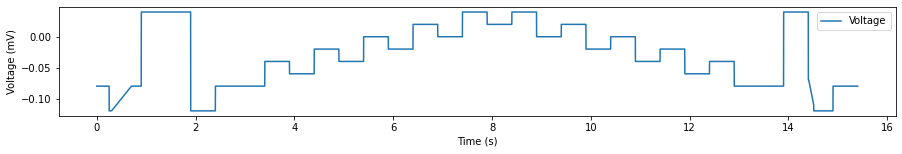

In [8]:
fig, ax = plt.subplots(figsize=(15,2))    
# fig.suptitle('New ORD-hERG - '+ ord._cell_types[cell_mode] +' cell', fontsize=16)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')     
ax.plot(times, kylie.V, label='Voltage')    

# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "voltage.jpg"), dpi=100)

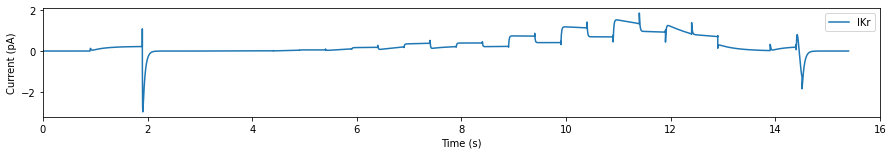

In [9]:
fig, ax = plt.subplots(figsize=(15,2))    
# fig.suptitle('New ORD-hERG - '+ ord._cell_types[cell_mode] +' cell', fontsize=16)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')     
ax.plot(times, kylie.IKr, label='IKr')    
ax.set_xlim(0,16)
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "IKr.jpg"), dpi=100)

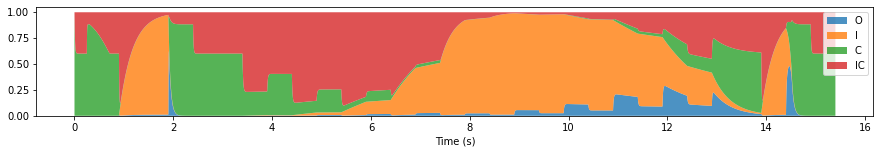

In [10]:
population_by_continent = {
    'O': kylie.open*kylie.active,
    'I': kylie.open*(1-kylie.active),
    'C': (1-kylie.open)*kylie.active,
    'IC': (1-kylie.open)*(1-kylie.active),    
}
fig, ax = plt.subplots(figsize=(15,2))    
# fig.suptitle('New ORD-hERG - '+ ord._cell_types[cell_mode] +' cell', fontsize=16)
# ax.set_title('Simulation %d'%(simulationNo))
plt.xlabel('Time (s)')
# plt.ylabel('Voltage (mV)')     
ax.stackplot(times, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
# ax.plot(times, kylie.active, label='Active')    
# textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
#     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
#     fig1 = plt.gcf()
ax.legend()
plt.show()
fig.savefig(os.path.join(result_folder, "Open_Active.jpg"), dpi=100)

In [11]:
print("finish")

finish
